In [2]:
# Instalando e Carregando nosso pacote para sepração das variaveis
install.packages("caTools")
install.packages("ggplot2")

library(caTools)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Carregando nosso dataset
dataset = read.csv("tempo_salarios.csv")

In [4]:
# Seprando nossas variaveis
divisao = sample.split(dataset$Salario, SplitRatio = 0.7)

In [5]:
# Criando nossa Base de Treinamento
dados_treinamento = subset(dataset, divisao == TRUE)

In [7]:
# Criando nossos dados de teste
dados_teste = subset(dataset, divisao == FALSE)

In [8]:
# Criando meu Regressor
regressor = lm(formula = Salario ~ AnosdeExperiencia, data = dados_treinamento)

In [9]:
# Verificando nosso detalhes estatisticos
summary(regressor)


Call:
lm(formula = Salario ~ AnosdeExperiencia, data = dados_treinamento)

Residuals:
    Min      1Q  Median      3Q     Max 
-7329.7 -3504.5  -709.6  2091.4 10751.8 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        24495.0     2504.5    9.78 7.52e-09 ***
AnosdeExperiencia   9581.1      399.1   24.00 1.13e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5297 on 19 degrees of freedom
Multiple R-squared:  0.9681,	Adjusted R-squared:  0.9664 
F-statistic: 576.2 on 1 and 19 DF,  p-value: 1.127e-15


In [10]:
# Criando minhas previsoes para dados de Treino

# dados_treinamento[1] --> anos de experiencia

previsoes_treino = predict(regressor, newdata = dados_treinamento[1])

# Vizualizando meus dados
previsoes_treino

1         3         4         7         8         9        10        13 
 35034.21  38866.66  43657.22  53238.35  55154.57  55154.57  59945.14  62819.47 
       14        15        16        17        19        21        22        24 
 63777.59  67610.04  71442.49  73358.71  81023.61  89646.63  92520.97 103060.20 
       25        27        28        29        30 
107850.77 115515.67 116473.78 123180.57 125096.80

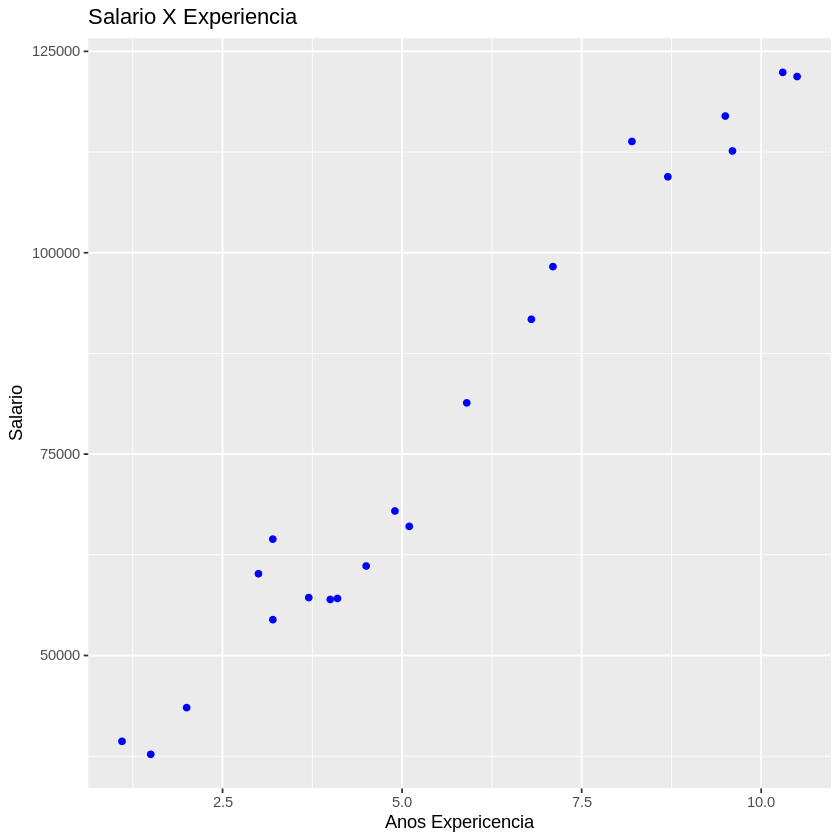

In [11]:
# Gerando nosso Grafico
ggplot() + geom_point(aes(x = dados_treinamento$AnosdeExperiencia, y = dados_treinamento$Salario),
                      colour = 'blue') + labs(title = 'Salario X Experiencia', x = 'Anos Expericencia',
                                              y = 'Salario')

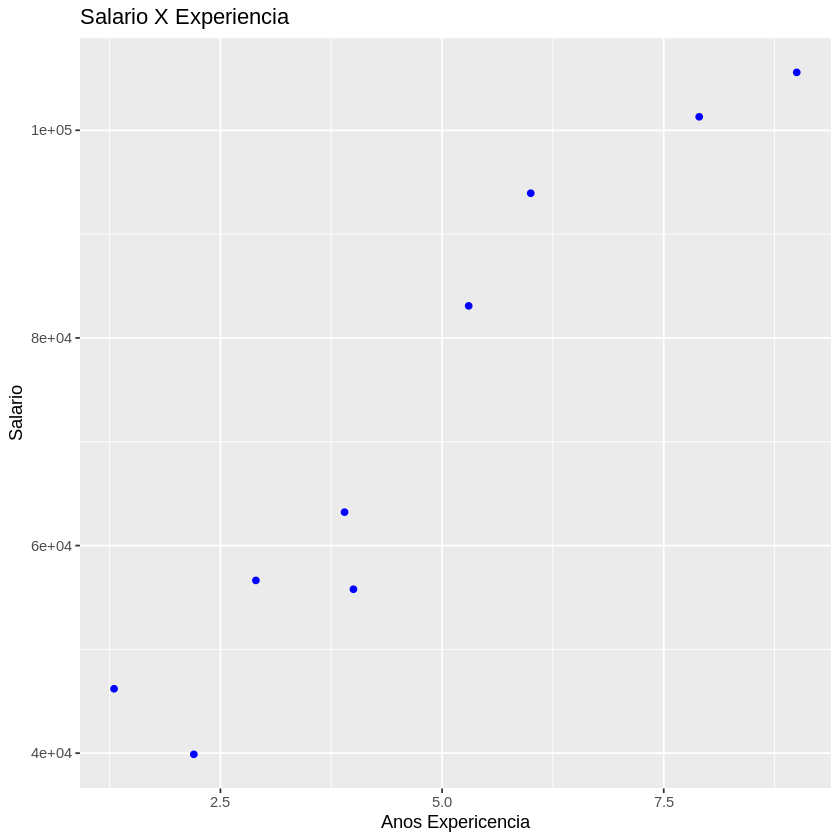

In [12]:
# Fazendo nossa previsoes para dados de teste
previsoes_teste = predict(regressor, newdata = dados_teste[1])

# Gerando nosso Grafico
ggplot() + geom_point(aes(x = dados_teste$AnosdeExperiencia, y = dados_teste$Salario),
                      colour = 'blue') + labs(title = 'Salario X Experiencia', x = 'Anos Expericencia',
                                              y = 'Salario')

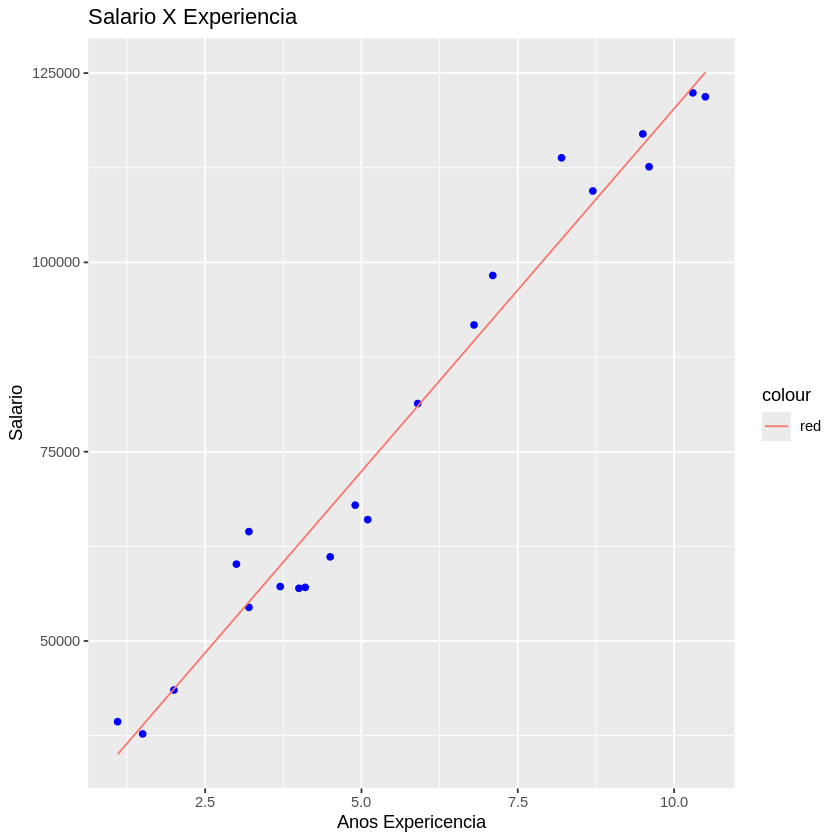

In [13]:
# Colocando nossa linha de de Regressão dados treino
ggplot() + geom_point(aes(x = dados_treinamento$AnosdeExperiencia, y = dados_treinamento$Salario),
                      colour = 'blue') + labs(title = 'Salario X Experiencia', x = 'Anos Expericencia',
                                              y = 'Salario') + geom_line(aes(x = dados_treinamento$AnosdeExperiencia,
                                                                             y = previsoes_treino, colour = 'red'))


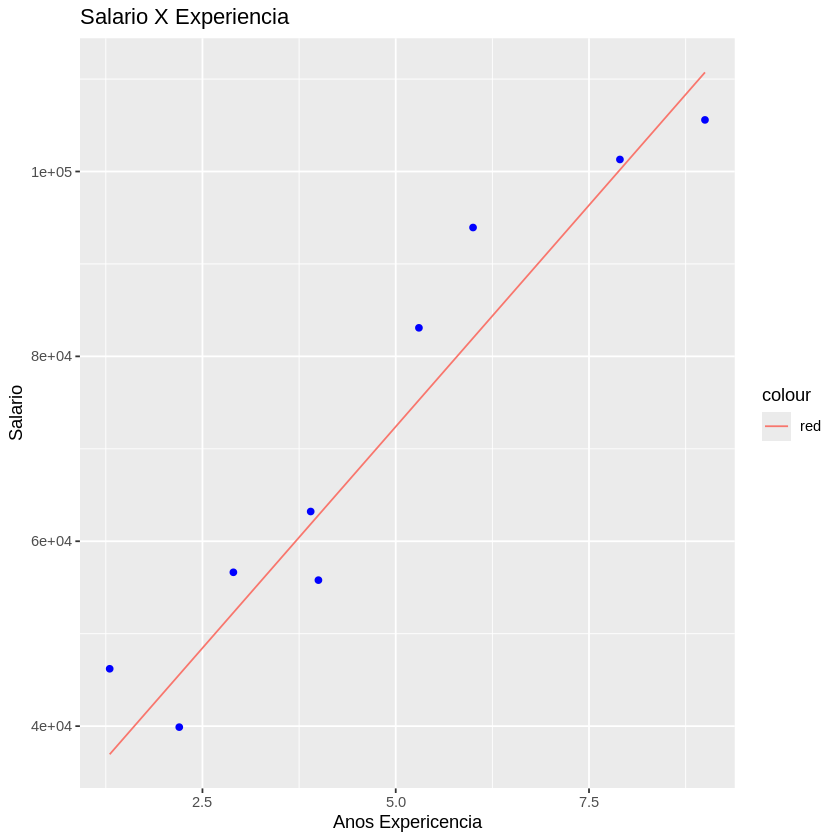

In [14]:
# Colocando nossa linha de de Regressão dados teste
ggplot() + geom_point(aes(x = dados_teste$AnosdeExperiencia, y = dados_teste$Salario),
                      colour = 'blue') + labs(title = 'Salario X Experiencia', x = 'Anos Expericencia',
                                              y = 'Salario') + geom_line(aes(x = dados_teste$AnosdeExperiencia,
                                                                             y = previsoes_teste, colour = 'red'))


In [15]:
# Gerando nosso Mean Absolute Error
resultado = abs(dados_teste[2] - previsoes_teste)
resultado

,Salario
,<dbl>
2,9254.568
5,5682.446
6,4361.766
11,1356.639
12,7025.473
18,7813.062
20,11958.274
23,1116.134
26,5143.105


In [16]:
# Verificando nossa Média
mean(resultado[['Salario']])

[1] 5967.941

In [17]:
# Chamando meu Pacote para vizualizarmos RSquared ou R² OU R ao quadrado
install.packages('miscTools')
library(miscTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
# 1 parametro --> valores reais "base_teste[['price']]"
# 2 parametro --> os valores do erro dos pontos ate a reta
cr = rSquared(dados_teste[['Salario']], resid = dados_teste[['Salario']] - previsoes_teste)

# Vizualizando meus resultado
cr

0.913637
